In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

# Unstructured Text

* Lecture Credits:
    - [Berkeley: DS100](https://docs.google.com/presentation/d/1ECr_XrDJXaLK-eGwWlydLjJu-3xwpzFcV4fGMSfwKwU/edit?usp=sharing)
    - [Princeton: COS226](http://www.cs.princeton.edu/courses/archive/spring17/cos226/lectures/54RegularExpressions.pdf)

## Outline

* Canonicalization
* Regex
* Information Extraction

## Joining on text

* Will these join? What are the problems?
* How would you clean the dataframes to join them?
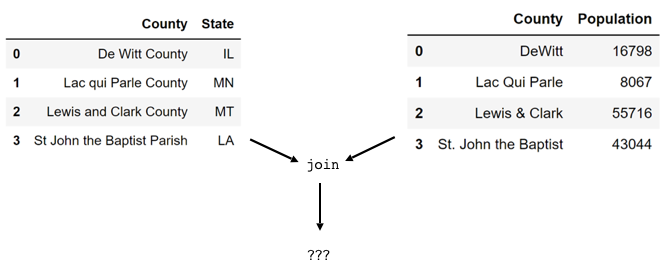

## Joining on text: cleaning the join key
* Upper vs lower case
* Words "county" and "parish" don't add information in these datasets
* Take care of common variants of words
* Take care of punctuation

In [ ]:
county_and_state = pd.read_csv("data/county_and_state.csv")
county_and_pop = pd.read_csv("data/county_and_pop.csv")

In [ ]:
display(county_and_state)
display(county_and_pop)

In [ ]:
# Naive join
county_and_state.merge(county_and_pop)

In [ ]:
def clean_county(county):
    return (county
            .lower()
            .strip()
            .replace(' ', '')
            .replace('county', '')
            .replace('parish', '')
            .replace('&', 'and')
            .replace('.', ''))

In [ ]:
county_and_pop['County'] = county_and_pop['County'].apply(clean_county)
county_and_pop

In [ ]:
county_and_state['County'] = county_and_state['County'].apply(clean_county).to_frame()
county_and_state

In [ ]:
county_and_state.merge(county_and_pop)

## Canonicalization
* Create a sequence of steps that transforms both columns into a single form.

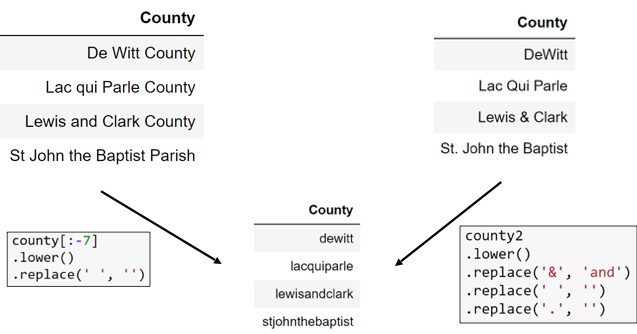

## Canonicalization

Replace each string with a unique representation.
- Used string methods
- Very brittle procedure; may only work for X% of the data.
- Hard to verify correctness.
- Also *parse* data using a data model if given the choice!

### Question: limitations of string methods 

* Suppose we want to extract the date and time from the following string:
```
170.242.51.168 - - [14/Mar/2018:12:09:20 -0800] "GET /my/home/ HTTP/1.1" 200 2585
```
* How would you do this?

### Limitations of string methods 

```
170.242.51.168 - - [14/Mar/2018:12:09:20 -0800] "GET /my/home/ HTTP/1.1" 200 2585
```
Steps:
1. Get string between `[` and `]`
2. Parse date as day/month/year:hour:min:sec without the timezone
    - in `strftime` format: `%d/%b/%y:%H:%M:%S`
    
What could go wrong with this technique?

In [ ]:
s = '''170.242.51.168 - - [14/Mar/2018:12:09:20 -0800] "GET /my/home/ HTTP/1.1" 200 2585'''

dt = s[s.find('[') + 1:s.find(']') - 6]
dt

In [ ]:
dt.split('/')

In [ ]:
day, month, year_time = dt.split('/')

In [ ]:
year, hour, minute, second =  year_time.split(':')

In [ ]:
year, month, day, minute, second

In [ ]:
# better: if date format changes, will throw a descriptive error! (good!)
pd.to_datetime(dt, format='%d/%b/%Y:%H:%M:%S')

## Regular Expressions (`regexp`)

* Fast, compact way of matching patterns in text
* Python library: `import re`
* Advantages: powerful; capable of matching very complex patterns.
* Disadvantages: 
    - It's still text processing, so brittle and likely to break.
    - Hard to understand: "write-only" language.

## Regular expression solution to log parsing
* Regex pattern uses the same logic as log parsing

In [ ]:
s

In [ ]:
import re
pat = '\[(.+)\/(.+)\/(.+):(.+):(.+):(.+) .+\]'
re.findall(pat, s)

## Regular Expressions: the more specific, the better!
* Be as specific in your pattern matching as possible
    - Easier to validate the extracted text
    - Easier for error handling (understanding what went wrong).
    
* A better date extraction pattern uses:
```
'\[([0-9]{2}\/[A-Z]{1}[a-z]{2}\/[0-9]{4}:[0-9]{2}:[0-9]{2}:[0-9]{2} -[0-9]{4})\]'
```

In [ ]:
s

In [ ]:
pat1 = '\[(.+\/.+\/.+:.+:.+:.+ .+)\]'
re.findall(pat1, s)[0]

In [ ]:
pat2 = '\[([0-9]{2}\/[A-Z]{1}[a-z]{2}\/[0-9]{4}:[0-9]{2}:[0-9]{2}:[0-9]{2} -[0-9]{4})\]'
re.findall(pat2, s)[0]

## Regexp Expressions
* Parsing the expression:
```
'\[([0-9]{2}\/[A-Z]{1}[a-z]{2}\/[0-9]{4}:[0-9]{2}:[0-9]{2}:[0-9]{2} -[0-9]{4})\]'
```

* `[0-9]{2}` matches any 2-digit number.
* `[A-Z]{1}` matches any single occurrence of any upper-case letter.
* `[a-z]{2}` matches any 2 consecutive occurrences of lower-case letters.
* Certain special characters (`[`, `]`, `/`) need to be escaped with `\`

In [ ]:
# Why is pattern 2 better?
t = '[adr/jduy/wffsdffs:r4s4:4wsgdfd:asdf 7]'

In [ ]:
t

In [ ]:
re.findall(pat, t)[0]

In [ ]:
# Easy to check if something mis-parsed: empty list!
re.findall(pat2, t)

## Regular Expressions: Applications

* Source Code: IDE syntax highlighting
* Google Code Search
* Scanning for viruses
* Validating text for data-entry

## You may already know regular expressions
* Google supports wildcard search `*` and union `|`
![google](imgs/regex_google.png)

### Regular Expression Syntax

* The four 'building blocks' for all regular expressions:
    - "order" specifies "order of operations"

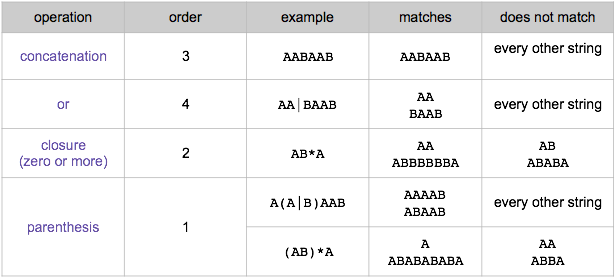

In [ ]:
# examples of each
re.search('AB*A', 'ABBBBBBA')

In [ ]:
re.search('AB*A', 'AB')

### Discussion

1. Give a regular expression that matches "moon", "moooon", etc. 
    - Should match any **even** positive number of 'o'.
2. Give a regex that matches muun, muuuun, moon, moooon, etc. 
    - Should match any **even** positive number of 'u' and 'o'.

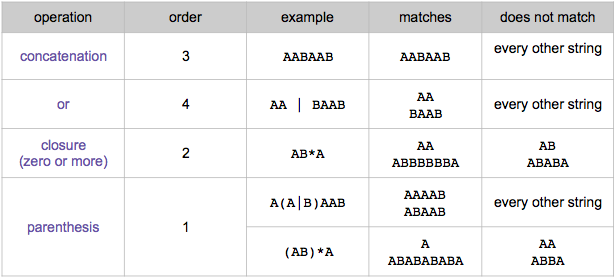

### Expanded Regexp Syntax

* The following operations offer convenience for expressive matching.

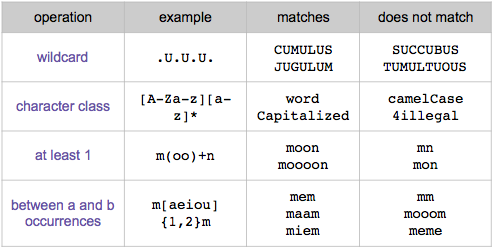

* Ex. `[A-E]+` is just shorthand for `(A|B|C|D|E)(A|B|C|D|E)*`


### More Regular Expression Examples


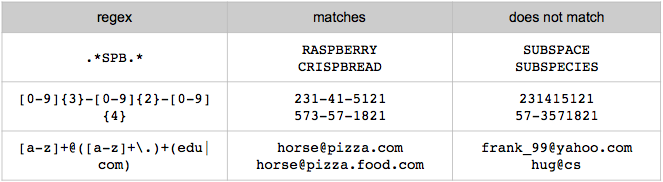

### Discussion Question

* Give a regular expression for any lowercase string that has a repeated vowel (i.e. noon, peel, festoon, looop, etc).
* Give a regular expression for any string that contains both a lowercase letter and a number, in any order.

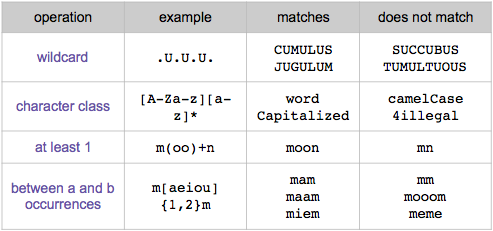

### Even More Regular Expressions

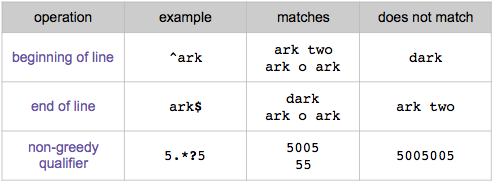

* Anchors (`^` and `$`) will be useful on HW).
* Non-greedy qualifier is useful, but won't be used in class.

## Limitations of Regular Expressions

Writing regular expressions is like writing a program.
* Need to know the syntax well.
* Can be easier to write than to read.
* Can be difficult to debug.

Regular expressions terrible at certain types of problems. Examples:
* Anything involving counting (same number of instances of a and b).
* Anything involving complex structure (palindromes).
* Parsing highly complex text structure.

### Email address validation using regexp

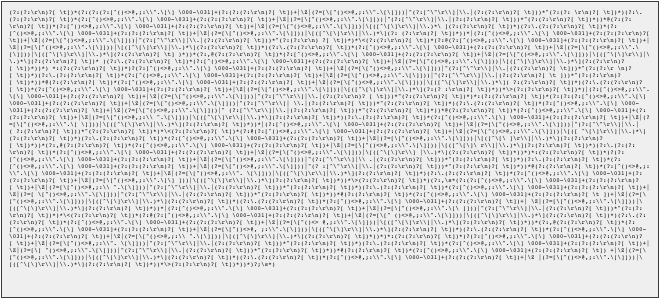

### Regexp for data validation
* See [postmortem](http://stackstatus.net/post/147710624694/outage-postmortem-july-20-2016)
![so_regexp](imgs/so_regexp.png)

### More regexp syntax

For more regexp info, see:
* [DS100 Textbook](https://www.textbook.ds100.org/ch/08/text_regex.html)
* [Python Documentation](https://docs.python.org/3/library/re.html)

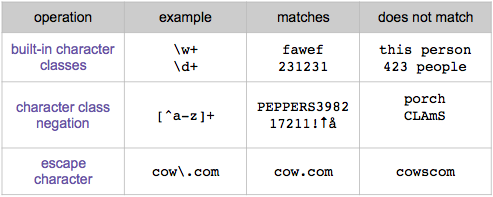

## Python `re` library functions
* `re.search`:
    - `m = re.search(r, s); m.groups`
* `re.findall`
* `re.sub`

Also in Pandas!

## Regexp Groups (Briefly)
* Use `(` regex `)` to *extract* text from a string.

In [ ]:
s

In [ ]:
ip_pattern = '([0-9]{3}\.[0-9]{3}\.[0-9]{2}\.[0-9]{3})'
dt_pattern = '\[(.*)\]'

In [ ]:
re.findall(ip_pattern, s)

In [ ]:
re.findall(dt_pattern, s)

In [ ]:
pat = '%s|%s' %(ip_pattern, dt_pattern)
pat

In [ ]:
# now have *two* possible group matches!
re.findall(pat, s)

### Example: San Diego City Employee Salaries
* Recall Lecture 01: Do men and women make similar salaries?
* Follow-up question: Do men and women make similar salaries among those with similar jobs?
    - How to determine "similar jobs?"

In [ ]:
salaries = pd.read_csv('https://transcal.s3.amazonaws.com/public/export/san-diego-2017.csv')
jobtitles = salaries['Job Title']

In [ ]:
jobtitles.value_counts().iloc[:100]

In [ ]:
jobtitles.shape[0], jobtitles.nunique()

In [ ]:
jobtitles.value_counts().iloc[:100].plot(kind='bar')

### Cleaning job titles: assessment
* Can we canonicalize job titles?
* Are they self-consistent?
    - Punctuation? Capitalization? Abbreviations?

In [ ]:
# run / rerun
jobtitles.sample(10)

### Cleaning job titles: step 1
* Is every first letter capitalized?
* What punctuation exists? should it be cleaned?

In [ ]:
# Capitalization
jobtitles[(
    jobtitles.str.contains(' [a-z]+ ') | 
    jobtitles.apply(lambda x:x[0].islower())
)]

In [ ]:
# punctuation: replace with space?
jobtitles[jobtitles.str.contains('[^A-Za-z0-9 ]')].head(15)

### Cleaning job titles: step 1
* Remove: to, the, for
* Replace: non-alphanumeric with space
* Replace multiple spaces with one space

In [ ]:
jobtitles = (
    jobtitles
    .str.replace(' to| the| for', '')  # include the spaces! (why?)
    .str.replace('[^A-Za-z0-9 ]', ' ')
    .str.replace(' +', ' ')
)

In [ ]:
jobtitles.sample(10)

### Cleaning job titles: abbreviations 

* Which job titles are inconsistently described?
    - Librarian? Engineer? Director?

In [ ]:
jobtitles[jobtitles.str.contains('Libr')].value_counts()

In [ ]:
jobtitles[jobtitles.str.contains('Eng')].value_counts()

In [ ]:
jobtitles[jobtitles.str.contains('Dir')].value_counts()

### The limits of canonicalization
* How do we find which common words to map a job title to?
    - E.g. pattern matching on 'Eng' or 'Libr'
* What about other titles? (there are too many!)
* Adjectives vs Nouns have different meanings
    - Junior/Senior/Director vs Police/Fire/Engineer

### The limits of canonicalization

Naive procedure: 
1. Compute most common words
2. Select "relevant" words using domain expertise
3. Check if a given word is contained in a given job title.

In [ ]:
# compute counts of all words (together)
bow = jobtitles.str.split().sum()
words = pd.Series(bow).value_counts()
words.head()

In [ ]:
# is a given word in a job-title? 0/1
jobtypes = pd.DataFrame([], index=salaries.index)
for word in words.index:
    jobtypes[word] = jobtitles.str.contains(word).astype(int)

In [ ]:
jobtypes.head()

In [ ]:
# how many columns? (curse of dimensionality)
len(jobtypes.columns)

In [ ]:
jobtypes.iloc[:,:20].sum()

In [ ]:
# What about those with sum = 0? sum > 1?
jobtypes.iloc[:,:20].sum(axis=1).head(12)#.describe()

### What are the closest job titles to 'Asst Fire Chief'


* Idea: which other job titles share "the most" words in common?
* Implementation: use the 'word vectors' in `jobtypes` to count up matching words.

In [ ]:
# what are the closest job titles to:
jobidx = 109
job = jobtitles.iloc[jobidx]
job

In [ ]:
job1 = jobtitles.iloc[0]
job1

In [ ]:
# word vectors side-by-side
pd.concat([jobtypes.iloc[0], jobtypes.iloc[109]], axis=1).head(10)

In [ ]:
cnts = pd.concat([jobtypes.iloc[0], jobtypes.iloc[109]], axis=1)

(cnts.iloc[:,0] * cnts.iloc[:,1]).head(10)

In [ ]:
# sum the matches
np.sum(cnts.iloc[:,0] * cnts.iloc[:,1])

## Solution attempt 1: bag of words
1. Create a list of all words appearing among *all* text ('bag of words')
2. Create a vector, indexed by the distinct words, with counts of the words in that entry.
3. Two text entries are similar if the sum of their matches is large.
    - The sum of their matches is the same as the dot-product of the vectors!

### Discussion Question

Given the list of sentences below:
1. What is the index for the word vectors of the sentences?
2. How close are the word-vectors of the first and second sentence?

In [ ]:
sentences = [
    'the fox and the moon',
    'the cow and the moon',
    'the cow and the spoon'
]
pd.Series(sentences)

### Answer

In [ ]:
sentences = pd.Series(sentences)
sentences

In [ ]:
words = pd.Series(sentences.str.split().sum()).value_counts()
words

In [ ]:
wordvecs = pd.DataFrame([], index=sentences.index)
for word in words.index:
    wordvecs[word] = sentences.str.contains(word).astype(int)
    
wordvecs

In [ ]:
np.sum(wordvecs.iloc[0] * wordvecs.iloc[1])

### Bag of Words: Salaries
* Compute the sum of matches among all word vectors and 'Asst Fire Chief'
* Take the job that is the closest match

In [ ]:
jobtitles.iloc[jobidx]

In [ ]:
jobvec = jobtypes.iloc[jobidx]
jobvec.head()

In [ ]:
# dot product with 'Asst Fire Chief' and *all* other titles
matches = jobtypes.apply(lambda ser: np.dot(jobvec, ser), axis=1)
matches.head(10)

In [ ]:
jobtitles.loc[matches.sort_values(ascending=False).index].head(10)

## Summary: Bag of Words

* Create an index out of *all* distinct words 
    - The basis for the vector space of words.
* Create vectors for each text entry by computing the counts of words in the entry.
* The dot product between two vectors is proportional to their 'similarity':
    - This defines the **cosine similarity** between vectors via: $$dist(v, w) = 1 - \cos(\theta) = 1 - \frac{v \cdot w}{|v||w|}$$

### Conclusion: Bag of Words
* Bag of words *embeds words into a vector space*
* Can then use clustering (e.g. k-means) to group like words (e.g. into 'job-types')
    - Unfortunately, many clustering techniques don't work well in high dimensions.
* Downside: treats all words as *equally important*.
    - "Asst Fire Chief" vs "Asst Chief Oper Ofcr"

## TF-IDF

Term Frequency / Inverse Document Frequency

### Term Frequency, Inverse Document Frequency

How do we figure out which words are "important" in a document?

1. The most common words often *don't* have much meaning!
2. The very rare words are also less important!

Goal: balance these two observations.

## Term Frequency, Inverse Document Frequency

* The *term frequency* of a word $t$ in a document $d$, denoted ${\rm tf}(t,d)$, is the likelihood of the term appearing in the document.
* The *inverse document frequency* of a word $t$ in a set of documents $\{d_i\}$, denoted ${\rm idf}(t,d)$ is: 

$$\log(\frac{{\rm\ total\ number\ of\ documents}}{{\rm number\ of\ documents\ in\ which\ t\ appears}})$$

* The *tf-idf* of a term $t$ in document $d$ is given by the product: 

$${\rm tfidf}(t,d) = {\rm tf}(t,d) \cdot {\rm idf}(t)$$

In [ ]:
# What is the tf-idf of 'cow' in the second 'document'?
sentences

### Answer

In [ ]:
# the term frequency of 'cow' in the second 'document'
tf = sentences.iloc[1].count('cow') / len(sentences.iloc[1])
tf

In [ ]:
idf = np.log(len(sentences) / sentences.str.contains('cow').sum())

In [ ]:
idf

In [ ]:
tf * idf

### TF-IDF of all terms in all documents
* What are the different reasons tf-idf can be zero?
* When is it the largest?

In [ ]:
sentences

In [ ]:
words = pd.Series(sentences.str.split().sum())

In [ ]:
tfidf = pd.DataFrame([], index=sentences.index)  # dataframe of documents
for w in words.unique():
    tf = sentences.str.count(w) / (sentences.str.count(' ') + 1)
    idf = np.log(len(sentences) / sentences.str.contains(w).sum())
    tfidf[w] = tf * idf

In [ ]:
tfidf

### Summary: TF-IDF

* Term Frequency, Inverse Document Frequency balances:
    - how often a word appears in a document/sentence, with
    - how often a word appears *across* documents.
* For a given document, the word with the highest TF-IDF best summarizes that document.

### Example: State of the Union Addresses

* What are the important words for each address?

In [ ]:
sotu = open('data/stateoftheunion1790-2017.txt').read()

In [ ]:
print(sotu[:20000])

In [ ]:
speeches = sotu.split('\n***\n')[1:]

In [ ]:
def extract_struct(speech):
    L = speech.strip().split('\n', maxsplit=3)
    L[3] = re.sub('[^A-Za-z ]', ' ', L[3]).lower()
    return dict(zip(['speech', 'president', 'date', 'contents'], L))

In [ ]:
df = pd.DataFrame(list(map(extract_struct, speeches)))

In [ ]:
words = pd.Series(df.contents.str.split().sum())

In [ ]:
tfidf = pd.DataFrame([], index=df.index)  # dataframe of documents
tf_denom = (df.contents.str.count(' ') + 1)
for w in words.value_counts().iloc[0:500].index:
    tf = df.contents.str.count(w) / tf_denom
    idf = np.log(len(df) / df.contents.str.contains(w).sum())
    tfidf[w] =  tf * idf

In [ ]:
tfidf.head()

In [ ]:
summaries = tfidf.idxmax(axis=1)
summaries

In [ ]:
pd.concat([summaries, df.president], axis=1).groupby('president').apply(lambda x:x[0].unique())